In [1]:
%load_ext lab_black

In [6]:
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
from jax import grad, vmap
from multipledispatch import dispatch
from typing import Callable

key = jr.PRNGKey(123)

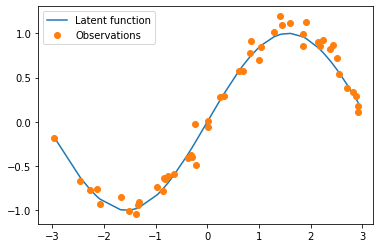

In [15]:
n = 50
x = jr.uniform(key, shape=(n,), minval=-3.0, maxval=3.0).sort()
signal = jnp.sin(x)
noise = jr.normal(key, signal.shape) * 0.1
y = signal + noise

plt.plot(x, signal, label="Latent function")
plt.plot(x, y, "o", label="Observations")
plt.legend(loc="best")

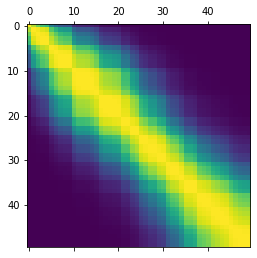

In [16]:
def compute_gram(func: Callable, x: jnp.array, y: jnp.array, jitter: float = 1e-6):
    K = vmap(lambda x1: vmap(lambda y1: func(x1, y1))(y))(x)
    if x.shape[0] == y.shape[0]:
        jitter_mat = jnp.eye(x.shape[0]) * jitter
        K += jitter_mat
    return K


def rbf(lengthscale: float, variance: float):
    def kernel(x, y):
        tau = jnp.square(x - y)
        return jnp.square(variance) * jnp.exp(-tau / (2 * jnp.square(lengthscale)))

    return kernel


kernel_fn = rbf(1.0, 1.0)
K = compute_gram(kernel_fn, x, x)
plt.matshow(K)

# Mean function

In [17]:
def zero_mean(x: jnp.array):
    return jnp.zeros_like(x)

# Prior samples

In [26]:
mu = zero_mean(x)
samples = jr.multivariate_normal(key, mu, K, shape=(20,))

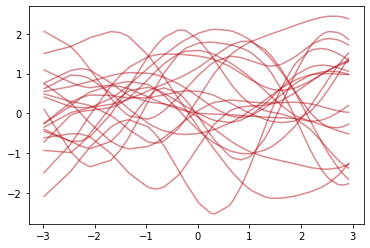

In [28]:
plt.plot(x, samples.T, color="#B5121B", alpha=0.5)
plt.show()

# Sample from the posterior

We can also condition on the observations and sample from the posterior. The posterior us uniquely characterised by a conditional mean and conditional variance, so we'll have a function for each of these.

In [ ]:
def conditionals(kernel_fn: Callable, mean_fn: Callable):
    def compute(X: jnp.array, Xtest: jnp.array, y: jnp.array):
        K = compute_gram(kernel_fn, X, X, jitter=)